In [47]:
import MetaTrader5 as mt5 
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller 
import matplotlib.pyplot as plt
from datetime import datetime
mt5.initialize()
# Replace following with your MT5 Account Login
account=51434456 # 
password="9UpBvVzc"
server = 'ICMarkets-Demo'

def get_rates(pair1, timeframe, x):
    pair1_df = pd.DataFrame(mt5.copy_rates_from_pos(pair1, timeframe, 0, x))
    pair1_df['time'] = pd.to_datetime(pair1_df['time'], unit='s')
    pair1_df.set_index('time', inplace=True)  # Set 'time' as index and modify the DataFrame in place
    return pair1_df['close']

### Data Gathering

In [37]:
fx_syms = ['EURUSD.a', 'GBPUSD.a', 'AUDUSD.a', 'EURCHF.a', 'AUDJPY.a', 'USDJPY.a']

In [38]:
fx_dataframe = pd.DataFrame()
com_dataframe = pd.DataFrame()

for sym in fx_syms:
    df = pd.DataFrame(get_rates(sym, mt5.TIMEFRAME_H4, 2500))
    # Rename columns to include the symbol name
    df.columns = [f'{sym}_{col}' for col in df.columns]
    fx_dataframe = pd.concat([fx_dataframe, df], axis=1)

### Portfolio Returns

In [76]:
weights = np.array([0.20, 0.02, 0.25, 0.13, 0.29, 0.11])

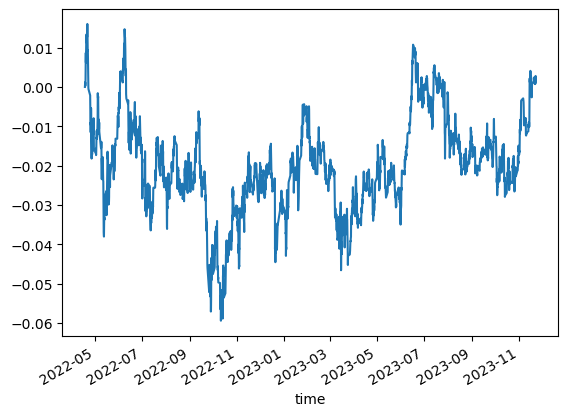

count    2500.000000
mean       -0.019984
std         0.012330
min        -0.059442
25%        -0.026661
50%        -0.020485
75%        -0.013465
max         0.016015
Name: Portfolio, dtype: float64

In [87]:
fx_ret = fx_dataframe.pct_change()
fx_symbols = fx_ret.columns
weighted_returns = fx_ret.mul(weights, axis = 1)
fx_ret['Portfolio'] = weighted_returns.sum(axis = 1)

# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+fx_ret["Portfolio"]).cumprod()-1)
CumulativeReturns.plot()
plt.show()
CumulativeReturns.describe()

In [78]:
sym_count = 6

port_ew = np.repeat(1/sym_count, sym_count) # Calcs portfolio equal weights
ew_port = fx_ret.iloc[:, 0:sym_count].mul(port_ew, axis = 1).sum(axis = 1)

In [79]:
fx_ret['cum_returns'] = CumulativeReturns
fx_ret['EW_cum_returns'] = ((1+ew_port).cumprod()-1)

In [80]:
fx_ret.columns

Index(['EURUSD.a_close', 'GBPUSD.a_close', 'AUDUSD.a_close', 'EURCHF.a_close',
       'AUDJPY.a_close', 'USDJPY.a_close', 'Portfolio', 'cum_returns',
       'EW_cum_returns'],
      dtype='object')

<Axes: xlabel='time'>

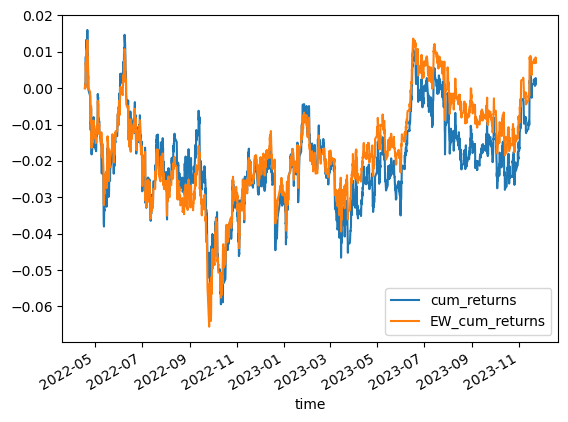

In [81]:
fx_ret[['cum_returns', 'EW_cum_returns']].plot()

In [85]:
fx_ret

,EURUSD.a_close,GBPUSD.a_close,AUDUSD.a_close,EURCHF.a_close,AUDJPY.a_close,USDJPY.a_close,Portfolio,cum_returns,EW_cum_returns
time,,,,,,,,,
2022-04-18 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000e+00
2022-04-18 08:00:00,-0.000056,-0.000545,0.001305,0.000275,0.001203,-0.000095,0.000678,0.000678,3.478431e-04
2022-04-18 12:00:00,0.001242,0.001675,0.001018,-0.000137,0.000225,-0.000805,0.000495,0.001174,8.842933e-04
2022-04-18 16:00:00,-0.002999,-0.002086,-0.002754,-0.001658,0.000740,0.003454,-0.000951,0.000222,-3.554223e-07
2022-04-18 20:00:00,0.000743,0.000115,-0.000150,0.000865,0.000043,0.000228,0.000263,0.000485,3.070199e-04
...,...,...,...,...,...,...,...,...,...
2023-11-22 00:00:00,0.000247,-0.000207,-0.000229,0.000093,-0.000863,-0.000681,-0.000325,0.000832,6.902024e-03
2023-11-22 04:00:00,-0.000568,-0.000790,-0.001983,-0.000114,0.001111,0.003068,0.000020,0.000851,7.023498e-03
2023-11-22 08:00:00,-0.000449,0.000303,0.001957,0.000187,0.004285,0.002373,0.001933,0.002786,8.476272e-03


In [83]:
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

# Calculate the market cap weights
mcap_weights = market_capitalizations/sum(market_capitalizations)
mcap_weights

array([0.18599625, 0.1450994 , 0.10807084, 0.09600524, 0.09269355,
       0.1103714 , 0.08314188, 0.1025266 , 0.07609485])

In [90]:
fx_ret[fx_symbols].cov()

,EURUSD.a_close,GBPUSD.a_close,AUDUSD.a_close,EURCHF.a_close,AUDJPY.a_close,USDJPY.a_close
EURUSD.a_close,0.000006,0.000006,5.578142e-06,1.627377e-06,0.000002,-3.184562e-06
GBPUSD.a_close,0.000006,0.000009,6.863716e-06,1.149727e-06,0.000003,-3.856743e-06
AUDUSD.a_close,0.000006,0.000007,1.081707e-05,6.988203e-07,0.000006,-4.316982e-06
EURCHF.a_close,0.000002,0.000001,6.988203e-07,2.993779e-06,0.000001,6.411036e-07
AUDJPY.a_close,0.000002,0.000003,6.493787e-06,1.337914e-06,0.000011,4.235200e-06
USDJPY.a_close,-0.000003,-0.000004,-4.316982e-06,6.411036e-07,0.000004,8.541162e-06
